In [3]:
#Install necessary packages.
!curl -s https://course.fast.ai/setup/colab | bash
!pip install --upgrade --quiet pip
!pip install --upgrade --quiet nibabel pydicom medpy
!pip install --upgrade --quiet SimpleITK

mkdir: cannot create directory ‘/root’: Permission denied
mkdir: cannot create directory ‘/root’: Permission denied
ln: failed to create symbolic link ‘/content’: Permission denied
ln: failed to create symbolic link ‘/content’: Permission denied
Updating fastai...
Done.


In [2]:
%pylab inline
import nibabel
import pydicom
import medpy
import SimpleITK
from fastai.vision import *
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
brats_path = pathlib.Path('./brats_2015/23_logs/Testing/HGG_LGG/')

In [4]:
mha = brats_path.ls()[0].ls()[0].ls()[0]

In [5]:
from medpy.io import load

In [6]:
def sitk_show(img, title=None, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [10]:
mha_path

'./brats_2015/BRATS2015_Training/HGG/brats_tcia_pat171_0387/VSD.Brain.XX.O.MR_T2.35660/VSD.Brain.XX.O.MR_T2.35660.mha'

In [31]:
mha_files = []
for path, dirs, files in os.walk('.'):
    for f in files:
        if '.mha' in f:
            mha_files.append(os.path.join(path, f))
            
t_files = [f for f in mha_files if '_T1' in f]

In [33]:
def load_vol(path):
    path = str(path) #correct for Posix Path types.
    img = SimpleITK.ReadImage(path)
    vol = SimpleITK.GetArrayFromImage(img)
    return vol

In [26]:
from nipype.interfaces.ants import N4BiasFieldCorrection

In [34]:
t_vol = load_vol(t_files[0])

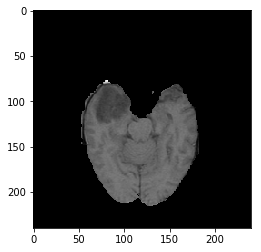

In [35]:
img = t_vol[50, :, :]
plt.imshow(img)

In [ ]:
img.ravel().shape()

([array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  arra